In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.util import ngrams
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/danielleronkos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
##Unickle this dataframe!
df = pd.read_pickle('all_tapwage_jds')
df.head()

,title,company,location,uid,tags,description,bullets,headers
0,PhD Program & Lab Manager (Hybrid) job,Mass General Brigham,"Charlestown, MA",48022361,"[PhD, Masters Degree, Bachelor's Degree, Entry...",DescriptionJob Summary:The School of Health an...,"[Maintains appropriate office systems, word pr...","[Job Summary:, Job Duties:, Program Manager Ro..."
1,PhD Program & Lab Manager (Hybrid) job,Massachusetts General Hospital,"Charlestown, MA",47983977,"[PhD, Masters Degree, Bachelor's Degree, Entry...",DescriptionJob Summary:The School of Health an...,"[Maintains appropriate office systems, word pr...","[Job Summary:, Job Duties:, Program Manager Ro..."
2,Assistant Professor - Clinical PhD Program - L...,Bertelsmann,"Los Angeles, CA",48973936,"[PhD, Fortune500, Media, Junior, Full-Time]",Assistant Professor - Clinical PhD Program - L...,[Active scholarship and/or relevant teaching e...,"[Our Mission:, Our Vision:, Duties & Responsib..."
3,Data Scientist / Statistician Intern (BS / MS ...,Lubrizol,"Hazelwood, DE",39232138,"[PhD, Bachelor's Degree, Data Science, Program...","Lubrizol, a Berkshire Hathaway company, is a m...",[Create predictive models by mining complex da...,[Data Scientist / Statistician Intern (BS/MS/P...
4,PhD Scientist Internship job,Danaher Corporation,"Madison, WI",49810371,"[PhD, Fortune500, Publicly Listed, Conglomerat...",Aldevron is an industry pioneer with a core co...,[Express recombinant proteins in microbial or ...,"[Job Summary:, Responsibilities:, Qualificatio..."


In [4]:
## Create column to isolate jobs that are not tagged with PhD (job may have expired so a weird
## replacement was scraped in its place)
df['phd_tag'] = df.tags.apply(lambda x: 'PhD' not in x)
## drop jobs w/o PhD tag
## consider dropping those w/o location UID etc split
## limit to just those with bullet points for first pass?? Do bullet points in LSA or whatever
## Run agg stats on location and company

In [5]:
df.head()

,title,company,location,uid,tags,description,bullets,headers,phd_tag
0,PhD Program & Lab Manager (Hybrid) job,Mass General Brigham,"Charlestown, MA",48022361,"[PhD, Masters Degree, Bachelor's Degree, Entry...",DescriptionJob Summary:The School of Health an...,"[Maintains appropriate office systems, word pr...","[Job Summary:, Job Duties:, Program Manager Ro...",False
1,PhD Program & Lab Manager (Hybrid) job,Massachusetts General Hospital,"Charlestown, MA",47983977,"[PhD, Masters Degree, Bachelor's Degree, Entry...",DescriptionJob Summary:The School of Health an...,"[Maintains appropriate office systems, word pr...","[Job Summary:, Job Duties:, Program Manager Ro...",False
2,Assistant Professor - Clinical PhD Program - L...,Bertelsmann,"Los Angeles, CA",48973936,"[PhD, Fortune500, Media, Junior, Full-Time]",Assistant Professor - Clinical PhD Program - L...,[Active scholarship and/or relevant teaching e...,"[Our Mission:, Our Vision:, Duties & Responsib...",False
3,Data Scientist / Statistician Intern (BS / MS ...,Lubrizol,"Hazelwood, DE",39232138,"[PhD, Bachelor's Degree, Data Science, Program...","Lubrizol, a Berkshire Hathaway company, is a m...",[Create predictive models by mining complex da...,[Data Scientist / Statistician Intern (BS/MS/P...,False
4,PhD Scientist Internship job,Danaher Corporation,"Madison, WI",49810371,"[PhD, Fortune500, Publicly Listed, Conglomerat...",Aldevron is an industry pioneer with a core co...,[Express recombinant proteins in microbial or ...,"[Job Summary:, Responsibilities:, Qualificatio...",False


In [6]:
df.shape

(6875, 9)

In [7]:
df[df['phd_tag'] == True]

,title,company,location,uid,tags,description,bullets,headers,phd_tag
13,Regulatory Affairs Representative (RCRA Expert...,Eastman Chemical Company,"Longview, TX",48603229,"[Fortune500, Publicly Listed, Industrials, Jun...",Regulatory Affairs Representative (RCRA Expert...,[Responsibility for site RCRA permitting (appl...,"[Qualifications:, Nearest Major Market:, Job S...",True
146,"Hardware Development Engineer, 3P Hardware job",Amazon,"Austin, TX",48640673,"[Fortune500, Conglomerate, Big Tech, Mid-Level...",DESCRIPTIONJob summaryAmazon Lab126 is an inve...,[Perform schematic design reviews and work wit...,"[DESCRIPTION, BASIC QUALIFICATIONS, PREFERRED ...",True
323,"Director of Managed Care, Behavioral Health (1...",The City and County of San Francisco,"San Francisco, CA",50105216,"[Government, Mid-Level, Managerial, Full-Time,...",Company DescriptionAppointment Type: Permanent...,"[Application Opening: April 27, 2022, Applicat...","[Appointment Type:, How to Apply:, Via email t...",True
564,"UNIX Engineer, Senior (Njus) job",NetJets,"Columbus, OH",46287322,"[Senior, Airlines, Aerospace, Full-Time, Linux...","Title: UNIX Engineer, Senior (NJUS) Company: N...","[Linux-Install, Patch and Tune operating syste...","[Nearest Major Market:, Purpose of Position, T...",True
712,"Senior Data Scientist, ESG Innovation and Solu...",S&P Global,"New York City, NY",45903576,"[Senior, Data Science, Programming, Data & Ana...","The Role: Senior Data Scientist, ESG Innovatio...",[Work with and coordinating interdisciplinary ...,"[The Role:, Grade:, Location:, The Role:, The ...",True
948,Recruiter job,Keystone Strategy,"Boston, NY",29665325,"[Consulting Firms, Talent Management, Recruiti...",Keystone is a premier strategy and economics c...,"[Bachelors Degree required, 2-5 years of recru...",[Qualifications],True
1461,"Fraud & Risk, Machine Learning Engineer (Staff...",Instacart,"San Francisco, CA",45680958,"[Startups, Unicorns, On Demand Cos, FoodTech, ...",We're transforming the grocery industryInstaca...,[This is an individual contributor role where ...,"[We're transforming the grocery industry, OVER...",True
1503,Deloitte Risk & Financial Advisory Solution De...,Deloitte,"Denver, CO",38982822,"[Consulting Firms, Auditors, Fortune500, Partn...",Position SummaryAre you interested in improvin...,[Learn to manage and operate one or more indus...,[Work you’ll do],True
1646,CIB Wholesale Payment Technology - Cloud / Dat...,JPMorgan Chase & Co.,"Plano, TX",50168645,"[Senior, Data Science, Programming, Data & Ana...",Organization DescriptionThe Corporate & Invest...,[Support the team in the writing of deployment...,"[Organization Description, Employer Descriptio...",True
1991,Open Rank job,University of North Carolina,"Piedmont, CA",50102998,"[Universities, Full-Time, No Degree Specified,...",The Division of Oncology at the UNC School of ...,[],[],True


In [8]:
## Drop jobs not tagged with PhD
df.drop(df[df['phd_tag'] == True].index, inplace = True)
df.head()

,title,company,location,uid,tags,description,bullets,headers,phd_tag
0,PhD Program & Lab Manager (Hybrid) job,Mass General Brigham,"Charlestown, MA",48022361,"[PhD, Masters Degree, Bachelor's Degree, Entry...",DescriptionJob Summary:The School of Health an...,"[Maintains appropriate office systems, word pr...","[Job Summary:, Job Duties:, Program Manager Ro...",False
1,PhD Program & Lab Manager (Hybrid) job,Massachusetts General Hospital,"Charlestown, MA",47983977,"[PhD, Masters Degree, Bachelor's Degree, Entry...",DescriptionJob Summary:The School of Health an...,"[Maintains appropriate office systems, word pr...","[Job Summary:, Job Duties:, Program Manager Ro...",False
2,Assistant Professor - Clinical PhD Program - L...,Bertelsmann,"Los Angeles, CA",48973936,"[PhD, Fortune500, Media, Junior, Full-Time]",Assistant Professor - Clinical PhD Program - L...,[Active scholarship and/or relevant teaching e...,"[Our Mission:, Our Vision:, Duties & Responsib...",False
3,Data Scientist / Statistician Intern (BS / MS ...,Lubrizol,"Hazelwood, DE",39232138,"[PhD, Bachelor's Degree, Data Science, Program...","Lubrizol, a Berkshire Hathaway company, is a m...",[Create predictive models by mining complex da...,[Data Scientist / Statistician Intern (BS/MS/P...,False
4,PhD Scientist Internship job,Danaher Corporation,"Madison, WI",49810371,"[PhD, Fortune500, Publicly Listed, Conglomerat...",Aldevron is an industry pioneer with a core co...,[Express recombinant proteins in microbial or ...,"[Job Summary:, Responsibilities:, Qualificatio...",False


In [9]:
df.shape

(6815, 9)

In [10]:
## Pickle this dataframe!
df.to_pickle('cleaned_tapwage_jds')

In [11]:
## 298 distinct tags, most common are PhD (obviously), Full-Time, Fortune500, Bachelor's Degree
## and Publicly Listed
## Looks like larger companies are more likely to hire PhDs
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

to_1D(df["tags"]).value_counts()

PhD                       6815
Full-Time                 6436
Fortune500                3182
Bachelor's Degree         3108
Publicly Listed           3034
                          ... 
Learning & Development       1
C-Suite                      1
Environment                  1
Cool Cars                    1
Fundraising                  1
Length: 298, dtype: int64

In [12]:
## Top 15 Tags (counts of more than 1000)
to_1D(df["tags"]).value_counts()[0:16]

PhD                  6815
Full-Time            6436
Fortune500           3182
Bachelor's Degree    3108
Publicly Listed      3034
Junior               2343
Masters Degree       2063
Programming          2026
Mid-Level            1855
Python               1810
Senior               1702
Universities         1476
Machine Learning     1216
Big Tech             1036
Healthcare           1024
C++                  1009
dtype: int64

In [13]:
tags_totals = to_1D(df["tags"]).value_counts()[0:16]

In [14]:
## pickle this
tags_totals.to_pickle('tags_counts_to_plot')

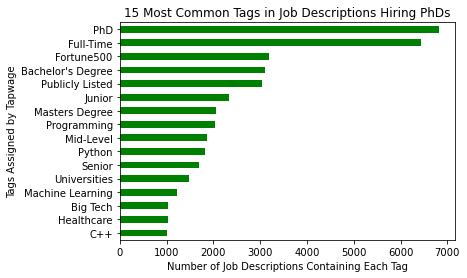

In [42]:
tags_totals.plot.barh(color='g')
plt.title("15 Most Common Tags in Job Descriptions Hiring PhDs")
plt.xlabel("Number of Job Descriptions Containing Each Tag")
plt.ylabel("Tags Assigned by Tapwage")
plt.gca().invert_yaxis()
plt.savefig('15_most_common_tags.png', bbox_inches='tight')
plt.show()

In [17]:
df['tag_number'] = df.tags.apply(lambda x: len(x))

In [18]:
df['jd_length_char'] = df.description.apply(lambda x: len(x))

In [19]:
df['header_number'] = df.headers.apply(lambda x: len(x))

In [20]:
df['bullets_number'] = df.bullets.apply(lambda x: len(x))

In [21]:
df['bullets_length_char'] = df.bullets.apply(lambda x: sum(len(s) for s in x))

In [23]:
df['bullets_percentage'] = df.bullets_length_char/df.jd_length_char

In [24]:
df.head()

,title,company,location,uid,tags,description,bullets,headers,phd_tag,tag_number,jd_length_char,header_number,bullets_number,bullets_length_char,bullets_percentage
0,PhD Program & Lab Manager (Hybrid) job,Mass General Brigham,"Charlestown, MA",48022361,"[PhD, Masters Degree, Bachelor's Degree, Entry...",DescriptionJob Summary:The School of Health an...,"[Maintains appropriate office systems, word pr...","[Job Summary:, Job Duties:, Program Manager Ro...",False,9,11255,15,67,6592,0.585695
1,PhD Program & Lab Manager (Hybrid) job,Massachusetts General Hospital,"Charlestown, MA",47983977,"[PhD, Masters Degree, Bachelor's Degree, Entry...",DescriptionJob Summary:The School of Health an...,"[Maintains appropriate office systems, word pr...","[Job Summary:, Job Duties:, Program Manager Ro...",False,9,11493,23,67,6592,0.573567
2,Assistant Professor - Clinical PhD Program - L...,Bertelsmann,"Los Angeles, CA",48973936,"[PhD, Fortune500, Media, Junior, Full-Time]",Assistant Professor - Clinical PhD Program - L...,[Active scholarship and/or relevant teaching e...,"[Our Mission:, Our Vision:, Duties & Responsib...",False,5,14701,25,63,6833,0.464798
3,Data Scientist / Statistician Intern (BS / MS ...,Lubrizol,"Hazelwood, DE",39232138,"[PhD, Bachelor's Degree, Data Science, Program...","Lubrizol, a Berkshire Hathaway company, is a m...",[Create predictive models by mining complex da...,[Data Scientist / Statistician Intern (BS/MS/P...,False,12,5075,7,17,1404,0.276650
4,PhD Scientist Internship job,Danaher Corporation,"Madison, WI",49810371,"[PhD, Fortune500, Publicly Listed, Conglomerat...",Aldevron is an industry pioneer with a core co...,[Express recombinant proteins in microbial or ...,"[Job Summary:, Responsibilities:, Qualificatio...",False,10,3494,5,9,963,0.275615


In [25]:
df.describe()

,tag_number,jd_length_char,header_number,bullets_number,bullets_length_char,bullets_percentage
count,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000
mean,9.446222,5337.507557,8.194277,17.622450,1856.411886,0.338811
std,3.365514,2222.774130,7.417908,11.703682,1374.631261,0.196684
min,3.000000,273.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3843.000000,3.000000,10.000000,926.500000,0.209695
50%,9.000000,5063.000000,7.000000,17.000000,1670.000000,0.350183
75%,12.000000,6461.000000,11.000000,24.000000,2544.000000,0.468452
max,25.000000,37533.000000,66.000000,94.000000,13055.000000,0.968300


In [26]:
## Data from: 6,815 job descriptions tagged with PhD
## Lengths between 273 characters and 37,533 characters, mean = 5338 characterss, std = 2223 characters
## Average of 8 sections, std = 7 sections
## Average of 18 bullet points, std = 12 bullets, min = 0 and max = 94

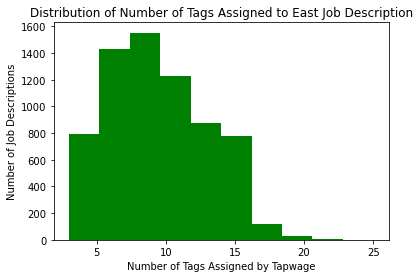

In [27]:
df.tag_number.plot.hist(color='g')
plt.title("Distribution of Number of Tags Assigned to East Job Description")
plt.xlabel("Number of Tags Assigned by Tapwage")
plt.ylabel("Number of Job Descriptions")
plt.show()

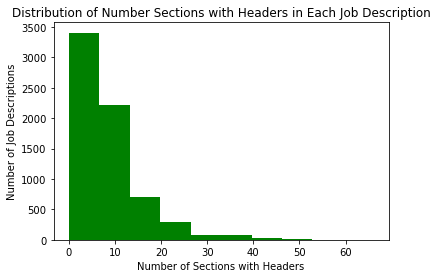

In [28]:
df.header_number.plot.hist(color='g')
plt.title("Distribution of Number Sections with Headers in Each Job Description")
plt.xlabel("Number of Sections with Headers")
plt.ylabel("Number of Job Descriptions")
plt.show()

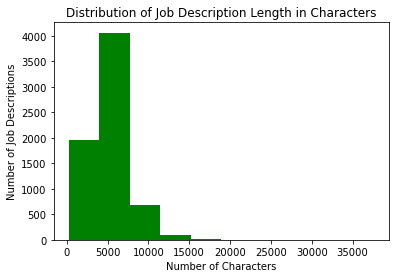

In [30]:
df.jd_length_char.plot.hist(color='g')
plt.title("Distribution of Job Description Length in Characters")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Job Descriptions")
plt.show()

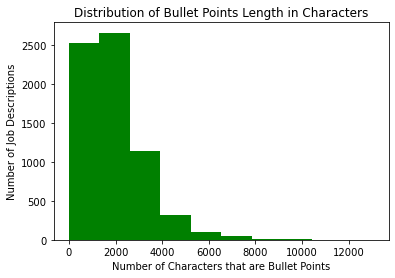

In [31]:
df.bullets_length_char.plot.hist(color='g')
plt.title("Distribution of Bullet Points Length in Characters")
plt.xlabel("Number of Characters that are Bullet Points")
plt.ylabel("Number of Job Descriptions")
plt.show()

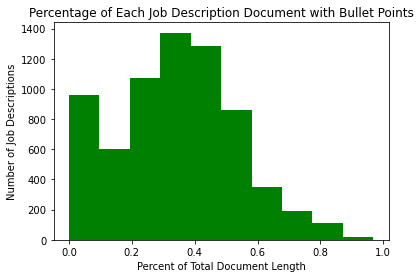

In [45]:
df.bullets_percentage.plot.hist(color='g')
plt.title("Percentage of Each Job Description Document with Bullet Points")
plt.xlabel("Percent of Total Document Length")
plt.ylabel("Number of Job Descriptions")
plt.savefig('percentage_bullet_points.png', bbox_inches='tight')
plt.show()

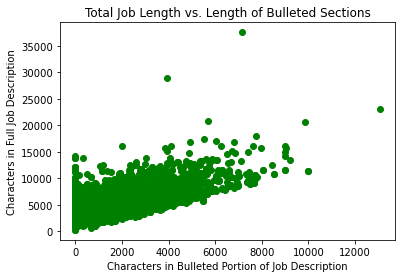

In [34]:
plt.scatter(df.bullets_length_char, df.jd_length_char, color='g')
plt.title("Total Job Length vs. Length of Bulleted Sections")
plt.xlabel("Characters in Bulleted Portion of Job Description")
plt.ylabel("Characters in Full Job Description")
plt.show()

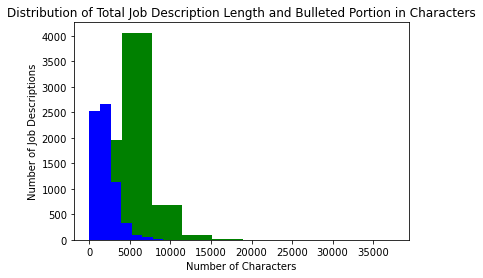

In [35]:
df.jd_length_char.plot.hist(color='g')
df.bullets_length_char.plot.hist(color='b')
plt.title("Distribution of Total Job Description Length and Bulleted Portion in Characters")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Job Descriptions")
plt.show()

In [36]:
## Focus on subset of data with bullet points
df['bullets_merged'] = df.bullets.apply(lambda x: ' '.join([str(sentence) for sentence in x]))

In [37]:
df.head(20)

,title,company,location,uid,tags,description,bullets,headers,phd_tag,tag_number,jd_length_char,header_number,bullets_number,bullets_length_char,bullets_percentage,bullets_merged
0,PhD Program & Lab Manager (Hybrid) job,Mass General Brigham,"Charlestown, MA",48022361,"[PhD, Masters Degree, Bachelor's Degree, Entry...",DescriptionJob Summary:The School of Health an...,"[Maintains appropriate office systems, word pr...","[Job Summary:, Job Duties:, Program Manager Ro...",False,9,11255,15,67,6592,0.585695,"Maintains appropriate office systems, word pro..."
1,PhD Program & Lab Manager (Hybrid) job,Massachusetts General Hospital,"Charlestown, MA",47983977,"[PhD, Masters Degree, Bachelor's Degree, Entry...",DescriptionJob Summary:The School of Health an...,"[Maintains appropriate office systems, word pr...","[Job Summary:, Job Duties:, Program Manager Ro...",False,9,11493,23,67,6592,0.573567,"Maintains appropriate office systems, word pro..."
2,Assistant Professor - Clinical PhD Program - L...,Bertelsmann,"Los Angeles, CA",48973936,"[PhD, Fortune500, Media, Junior, Full-Time]",Assistant Professor - Clinical PhD Program - L...,[Active scholarship and/or relevant teaching e...,"[Our Mission:, Our Vision:, Duties & Responsib...",False,5,14701,25,63,6833,0.464798,Active scholarship and/or relevant teaching ex...
3,Data Scientist / Statistician Intern (BS / MS ...,Lubrizol,"Hazelwood, DE",39232138,"[PhD, Bachelor's Degree, Data Science, Program...","Lubrizol, a Berkshire Hathaway company, is a m...",[Create predictive models by mining complex da...,[Data Scientist / Statistician Intern (BS/MS/P...,False,12,5075,7,17,1404,0.276650,Create predictive models by mining complex dat...
4,PhD Scientist Internship job,Danaher Corporation,"Madison, WI",49810371,"[PhD, Fortune500, Publicly Listed, Conglomerat...",Aldevron is an industry pioneer with a core co...,[Express recombinant proteins in microbial or ...,"[Job Summary:, Responsibilities:, Qualificatio...",False,10,3494,5,9,963,0.275615,Express recombinant proteins in microbial or e...
5,PhD Program Administrator (Academic Services S...,University of Colorado,"Aurora, CO",48304470,"[PhD, Bachelor's Degree, Universities, Event M...",University StaffDescriptionUniversity of Color...,[Applications are accepted electronically ONLY...,[University of Colorado | CU Anschutz Medical ...,False,7,11023,20,34,3873,0.351356,Applications are accepted electronically ONLY ...
6,"Program Manager, Undergraduate Initiatives & P...",University of Washington,"Seattle, WA",48714168,"[PhD, Bachelor's Degree, Universities, Event M...","As a UW employee, you have a unique opportunit...",[],[The UW Daniel J. Evans School of Public Polic...,False,8,12149,17,0,0,0.000000,
7,"Admissions & Pipeline Coordinator, MD / PhD Pr...",Yale University,"New Haven, CT",46628145,"[PhD, Bachelor's Degree, Universities, Mid-Lev...",STARS Requisition number71235BRPosting Positio...,[],[],False,7,8846,0,0,0,0.000000,
8,"Associate Director, MD - PhD Program job",University of Pennsylvania,"Center, TX",48700474,"[PhD, Bachelor's Degree, Universities, Mid-Lev...",University OverviewThe University of Pennsylva...,[Manage the application process. Update supple...,"[University Overview, Posted Job Title, Job Pr...",False,8,11223,27,37,7464,0.665063,Manage the application process. Update supplem...
9,PhD & Certificate Program Coordinator job,University of Minnesota,"Minneapolis, MN",49796468,"[PhD, Bachelor's Degree, Universities, Junior,...",About the JobPhD & Certificate Program Coordin...,[Counsel students to guide them through Progra...,"[PhD & Certificate Program Coordinator, About ...",False,6,10808,15,52,5153,0.476776,Counsel students to guide them through Program...


In [38]:
df_subset = df[df.bullets_merged != '']

In [39]:
df_subset.head(10)

,title,company,location,uid,tags,description,bullets,headers,phd_tag,tag_number,jd_length_char,header_number,bullets_number,bullets_length_char,bullets_percentage,bullets_merged
0,PhD Program & Lab Manager (Hybrid) job,Mass General Brigham,"Charlestown, MA",48022361,"[PhD, Masters Degree, Bachelor's Degree, Entry...",DescriptionJob Summary:The School of Health an...,"[Maintains appropriate office systems, word pr...","[Job Summary:, Job Duties:, Program Manager Ro...",False,9,11255,15,67,6592,0.585695,"Maintains appropriate office systems, word pro..."
1,PhD Program & Lab Manager (Hybrid) job,Massachusetts General Hospital,"Charlestown, MA",47983977,"[PhD, Masters Degree, Bachelor's Degree, Entry...",DescriptionJob Summary:The School of Health an...,"[Maintains appropriate office systems, word pr...","[Job Summary:, Job Duties:, Program Manager Ro...",False,9,11493,23,67,6592,0.573567,"Maintains appropriate office systems, word pro..."
2,Assistant Professor - Clinical PhD Program - L...,Bertelsmann,"Los Angeles, CA",48973936,"[PhD, Fortune500, Media, Junior, Full-Time]",Assistant Professor - Clinical PhD Program - L...,[Active scholarship and/or relevant teaching e...,"[Our Mission:, Our Vision:, Duties & Responsib...",False,5,14701,25,63,6833,0.464798,Active scholarship and/or relevant teaching ex...
3,Data Scientist / Statistician Intern (BS / MS ...,Lubrizol,"Hazelwood, DE",39232138,"[PhD, Bachelor's Degree, Data Science, Program...","Lubrizol, a Berkshire Hathaway company, is a m...",[Create predictive models by mining complex da...,[Data Scientist / Statistician Intern (BS/MS/P...,False,12,5075,7,17,1404,0.276650,Create predictive models by mining complex dat...
4,PhD Scientist Internship job,Danaher Corporation,"Madison, WI",49810371,"[PhD, Fortune500, Publicly Listed, Conglomerat...",Aldevron is an industry pioneer with a core co...,[Express recombinant proteins in microbial or ...,"[Job Summary:, Responsibilities:, Qualificatio...",False,10,3494,5,9,963,0.275615,Express recombinant proteins in microbial or e...
5,PhD Program Administrator (Academic Services S...,University of Colorado,"Aurora, CO",48304470,"[PhD, Bachelor's Degree, Universities, Event M...",University StaffDescriptionUniversity of Color...,[Applications are accepted electronically ONLY...,[University of Colorado | CU Anschutz Medical ...,False,7,11023,20,34,3873,0.351356,Applications are accepted electronically ONLY ...
8,"Associate Director, MD - PhD Program job",University of Pennsylvania,"Center, TX",48700474,"[PhD, Bachelor's Degree, Universities, Mid-Lev...",University OverviewThe University of Pennsylva...,[Manage the application process. Update supple...,"[University Overview, Posted Job Title, Job Pr...",False,8,11223,27,37,7464,0.665063,Manage the application process. Update supplem...
9,PhD & Certificate Program Coordinator job,University of Minnesota,"Minneapolis, MN",49796468,"[PhD, Bachelor's Degree, Universities, Junior,...",About the JobPhD & Certificate Program Coordin...,[Counsel students to guide them through Progra...,"[PhD & Certificate Program Coordinator, About ...",False,6,10808,15,52,5153,0.476776,Counsel students to guide them through Program...
10,Temporary Summer PhD Research Specialist job,The University of Chicago,"Chicago, IL",48469397,"[PhD, Universities, Junior, Temporary, Program...",DepartmentSSD: Economics - Staff and Temporary...,[Compiles and cleans survey and administrative...,"[Job Information, Job Summary:, Responsibiliti...",False,8,5876,30,18,1286,0.218856,Compiles and cleans survey and administrative ...
11,"University Recruiting Technical Sourcer, PhD R...",NVIDIA,"Santa Clara, CA",48710514,"[PhD, Bachelor's Degree, Media Technology, Sem...",We are seeking a University Recruiting Technic...,[Play a key role in partnering with hiring lea...,"[What you’ll be doing:, What we need to see:, ...",False,9,2804,3,13,1347,0.480385,Play a key role in partnering with hiring lead...


In [40]:
df_subset.shape

(6119, 16)

In [41]:
## pickle this
df_subset.to_pickle('bullet_points_corpus_w_punct')

In [155]:
## Make lowercase and remove punctuation
df.bullets_merged = df.bullets_merged.apply(lambda x: x.lower())
df.bullets_merged = df.bullets_merged.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [156]:
## pickle this
df_subset.to_pickle('bullet_points_corpus')

In [150]:
corpus = list(df.bullets_merged)

In [132]:
corpus[0]

'maintains appropriate office systems  word processing  databases  drafting basic correspondence  copying  filing  processing forms and requisitions while ensuring accuracy  establishes  coordinates  monitors  and revises database systems  ie  microsoft teams  formstack  d2l  for accurate program records of faculty  alumni  and program accomplishments  course syllabi and schedules  student files  special funds and projects  research and recruitment efforts  maintains calendars and schedules appointments for program administrative leaders  performs routine office related administrative duties such as order supplies  greet visitors and prospective students  handle incoming calls  provide assistance or make referrals to appropriate staff  successfully tracks and manages numerous tasks simultaneously  becomes well versed in phd program curriculum  course offerings and schedules  maintains  tracks and updates student files with their cvs  biosketches  and documentation for graduation audits

In [130]:
tokenized = [word_tokenize(word) for word in corpus]

In [131]:
tokenized[0]

['maintains',
 'appropriate',
 'office',
 'systems',
 'word',
 'processing',
 'databases',
 'drafting',
 'basic',
 'correspondence',
 'copying',
 'filing',
 'processing',
 'forms',
 'and',
 'requisitions',
 'while',
 'ensuring',
 'accuracy',
 'establishes',
 'coordinates',
 'monitors',
 'and',
 'revises',
 'database',
 'systems',
 'ie',
 'microsoft',
 'teams',
 'formstack',
 'd2l',
 'for',
 'accurate',
 'program',
 'records',
 'of',
 'faculty',
 'alumni',
 'and',
 'program',
 'accomplishments',
 'course',
 'syllabi',
 'and',
 'schedules',
 'student',
 'files',
 'special',
 'funds',
 'and',
 'projects',
 'research',
 'and',
 'recruitment',
 'efforts',
 'maintains',
 'calendars',
 'and',
 'schedules',
 'appointments',
 'for',
 'program',
 'administrative',
 'leaders',
 'performs',
 'routine',
 'office',
 'related',
 'administrative',
 'duties',
 'such',
 'as',
 'order',
 'supplies',
 'greet',
 'visitors',
 'and',
 'prospective',
 'students',
 'handle',
 'incoming',
 'calls',
 'provide',


In [140]:
cv = CountVectorizer(stop_words = 'english', min_df = .1)
X = cv.fit_transform(corpus)
dtm = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())

/Users/danielleronkos/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [159]:
dtm.head()

,10,ability,able,academic,activities,advanced,algorithms,analysis,analytical,analyze,...,use,using,various,verbal,vision,work,working,writing,written,years
0,0,4,1,1,0,0,0,1,0,0,...,0,0,0,0,0,2,4,0,0,1
1,0,4,1,1,0,0,0,1,0,0,...,0,0,0,0,0,2,4,0,0,1
2,0,10,0,3,1,0,0,0,0,0,...,0,0,0,0,0,4,1,0,0,1
3,0,2,0,0,0,1,2,0,0,0,...,0,4,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,1,1,0,0,0


In [142]:
## Drops from 19920 words vectorized to 231 if you make min df threshold .1

In [145]:
print(cv.get_feature_names())

['10', 'ability', 'able', 'academic', 'activities', 'advanced', 'algorithms', 'analysis', 'analytical', 'analyze', 'application', 'applications', 'applied', 'apply', 'appropriate', 'areas', 'assigned', 'bachelor', 'background', 'based', 'best', 'build', 'building', 'business', 'clearance', 'clinical', 'closely', 'collaborate', 'collaboration', 'collaborative', 'communicate', 'communication', 'complex', 'computer', 'concepts', 'conduct', 'conferences', 'contribute', 'control', 'create', 'cross', 'current', 'customer', 'customers', 'data', 'deep', 'degree', 'deliver', 'demonstrated', 'design', 'develop', 'developing', 'development', 'discipline', 'diverse', 'documentation', 'drive', 'education', 'effective', 'effectively', 'electrical', 'engineering', 'engineers', 'ensure', 'environment', 'equivalent', 'excellent', 'execution', 'experience', 'experiments', 'expertise', 'external', 'familiarity', 'field', 'functional', 'goals', 'good', 'hands', 'health', 'high', 'highly', 'identify', 'imp

In [161]:
dtm.info

<bound method DataFrame.info of       10  ability  able  academic  activities  advanced  algorithms  analysis  \
0      0        4     1         1           0         0           0         1   
1      0        4     1         1           0         0           0         1   
2      0       10     0         3           1         0           0         0   
3      0        2     0         0           0         1           2         0   
4      0        0     0         0           0         0           0         0   
...   ..      ...   ...       ...         ...       ...         ...       ...   
6810   0        0     0         0           0         0           0         2   
6811   0        0     0         0           1         2           0         0   
6812   0        1     0         0           7         1           0         0   
6813   0        1     0         0           1         1           0         0   
6814   0        0     0         0           0         0           0         3

In [163]:
dtm.describe()

,10,ability,able,academic,activities,advanced,algorithms,analysis,analytical,analyze,...,use,using,various,verbal,vision,work,working,writing,written,years
count,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,...,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000,6815.000000
mean,0.168452,1.276156,0.216728,0.210858,0.300367,0.362876,0.182245,0.739252,0.224505,0.161555,...,0.215701,0.339252,0.148349,0.187821,0.181658,1.630227,0.587821,0.155979,0.336757,1.986207
std,0.501043,2.001844,0.614722,0.690409,0.787165,0.808453,0.637316,1.358838,0.643144,0.460524,...,0.557643,0.770727,0.450519,0.422717,0.585149,2.019721,0.994938,0.497306,0.558593,2.400797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,3.000000
max,5.000000,25.000000,8.000000,10.000000,10.000000,8.000000,9.000000,16.000000,11.000000,5.000000,...,7.000000,9.000000,6.000000,3.000000,9.000000,15.000000,10.000000,10.000000,5.000000,21.000000


In [165]:
dtm.shape

(6815, 231)